##
Karar Ağaçları (DT'ler) , sınıflandırma ve regresyon için kullanılan parametrik olmayan denetimli bir öğrenme yöntemidir .
Amaç, veri özelliklerinden çıkarılan basit karar kurallarını öğrenerek bir hedef değişkenin değerini tahmin
eden bir model oluşturmaktır. Bir ağaç, parçalı sabit bir yaklaşım olarak görülebilir

Ağaç ne kadar derin olursa, karar kuralları o kadar karmaşık ve model o kadar uygun olur.

In [69]:
!pip install graphviz

!pip install pydotplus

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split # Train_test_split fonksiyonu
from sklearn import metrics #başarı oranını hesaplayan kütüphane

##
Bu veri seti orijinal olarak Ulusal Diyabet ve Sindirim ve Böbrek Hastalıkları 
Enstitüsü'nden alınmıştır. Veri setinin amacı, veri setinde yer alan belirli tanısal ölçümlere dayanarak bir hastanın 
diyabetli olup olmadığını tanısal olarak tahmin etmektir. Bu örneklerin daha büyük bir veritabanından
seçilmesine çeşitli kısıtlamalar getirildi. Özellikle, buradaki tüm hastalar, Pima Kızılderili mirasına sahip 
en az 21 yaşında kadınlardır.



## VERİ SETİNİ YÜKLÜYORUZ

In [45]:
col_adı= ['hamile', 'glikoz', 'kan basıncı', 'cilt', 'insulin', 'bmi', 'soy ağacı', 'yaş', 'label']
# veri setini yükleme
diyabet = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_adı)

In [46]:
diyabet.head()

,hamile,glikoz,kan basıncı,cilt,insulin,bmi,soy ağacı,yaş,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
diyabet.shape

(768, 9)

In [48]:
#özelliklere ve hedef değişkenleri veri kümesi içinde bölme
özellik = ['hamile', 'insulin', 'bmi', 'yaş','glikoz','kan basıncı','soy ağacı','cilt']
X = diyabet[özellik] # Özellikler
y = diyabet.label # hedef değişkenler

In [49]:
özellik

['hamile',
 'insulin',
 'bmi',
 'yaş',
 'glikoz',
 'kan basıncı',
 'soy ağacı',
 'cilt']

#Bazı özelliklere göre veri setini ayırmamız gerekiyor

In [67]:
# Eğitim ve test aşaması için veri setini bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test|

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [69]:
# Create Decision Tree sınıflandırı metodu
clf = DecisionTreeClassifier()

# Test Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Test veri kümesi için sonucu tahmin etme
y_pred = clf.predict(X_test)



In [70]:
# Model Doğruluğu: sınıflandırıcı ne sıklıkla doğrudur?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Modelin kesinliği : Ne kadarı pozitif 
print("Precision:",metrics.precision_score(y_test, y_pred))

# Hassiyet oranı
print("Recall:",metrics.recall_score(y_test, y_pred))

# F1 Score değeri
print("F1 Score:",metrics.f1_score(y_test, y_pred,average='binary'))


Accuracy: 0.6753246753246753
Precision: 0.5675675675675675
Recall: 0.49411764705882355
F1 Score: 0.5283018867924529


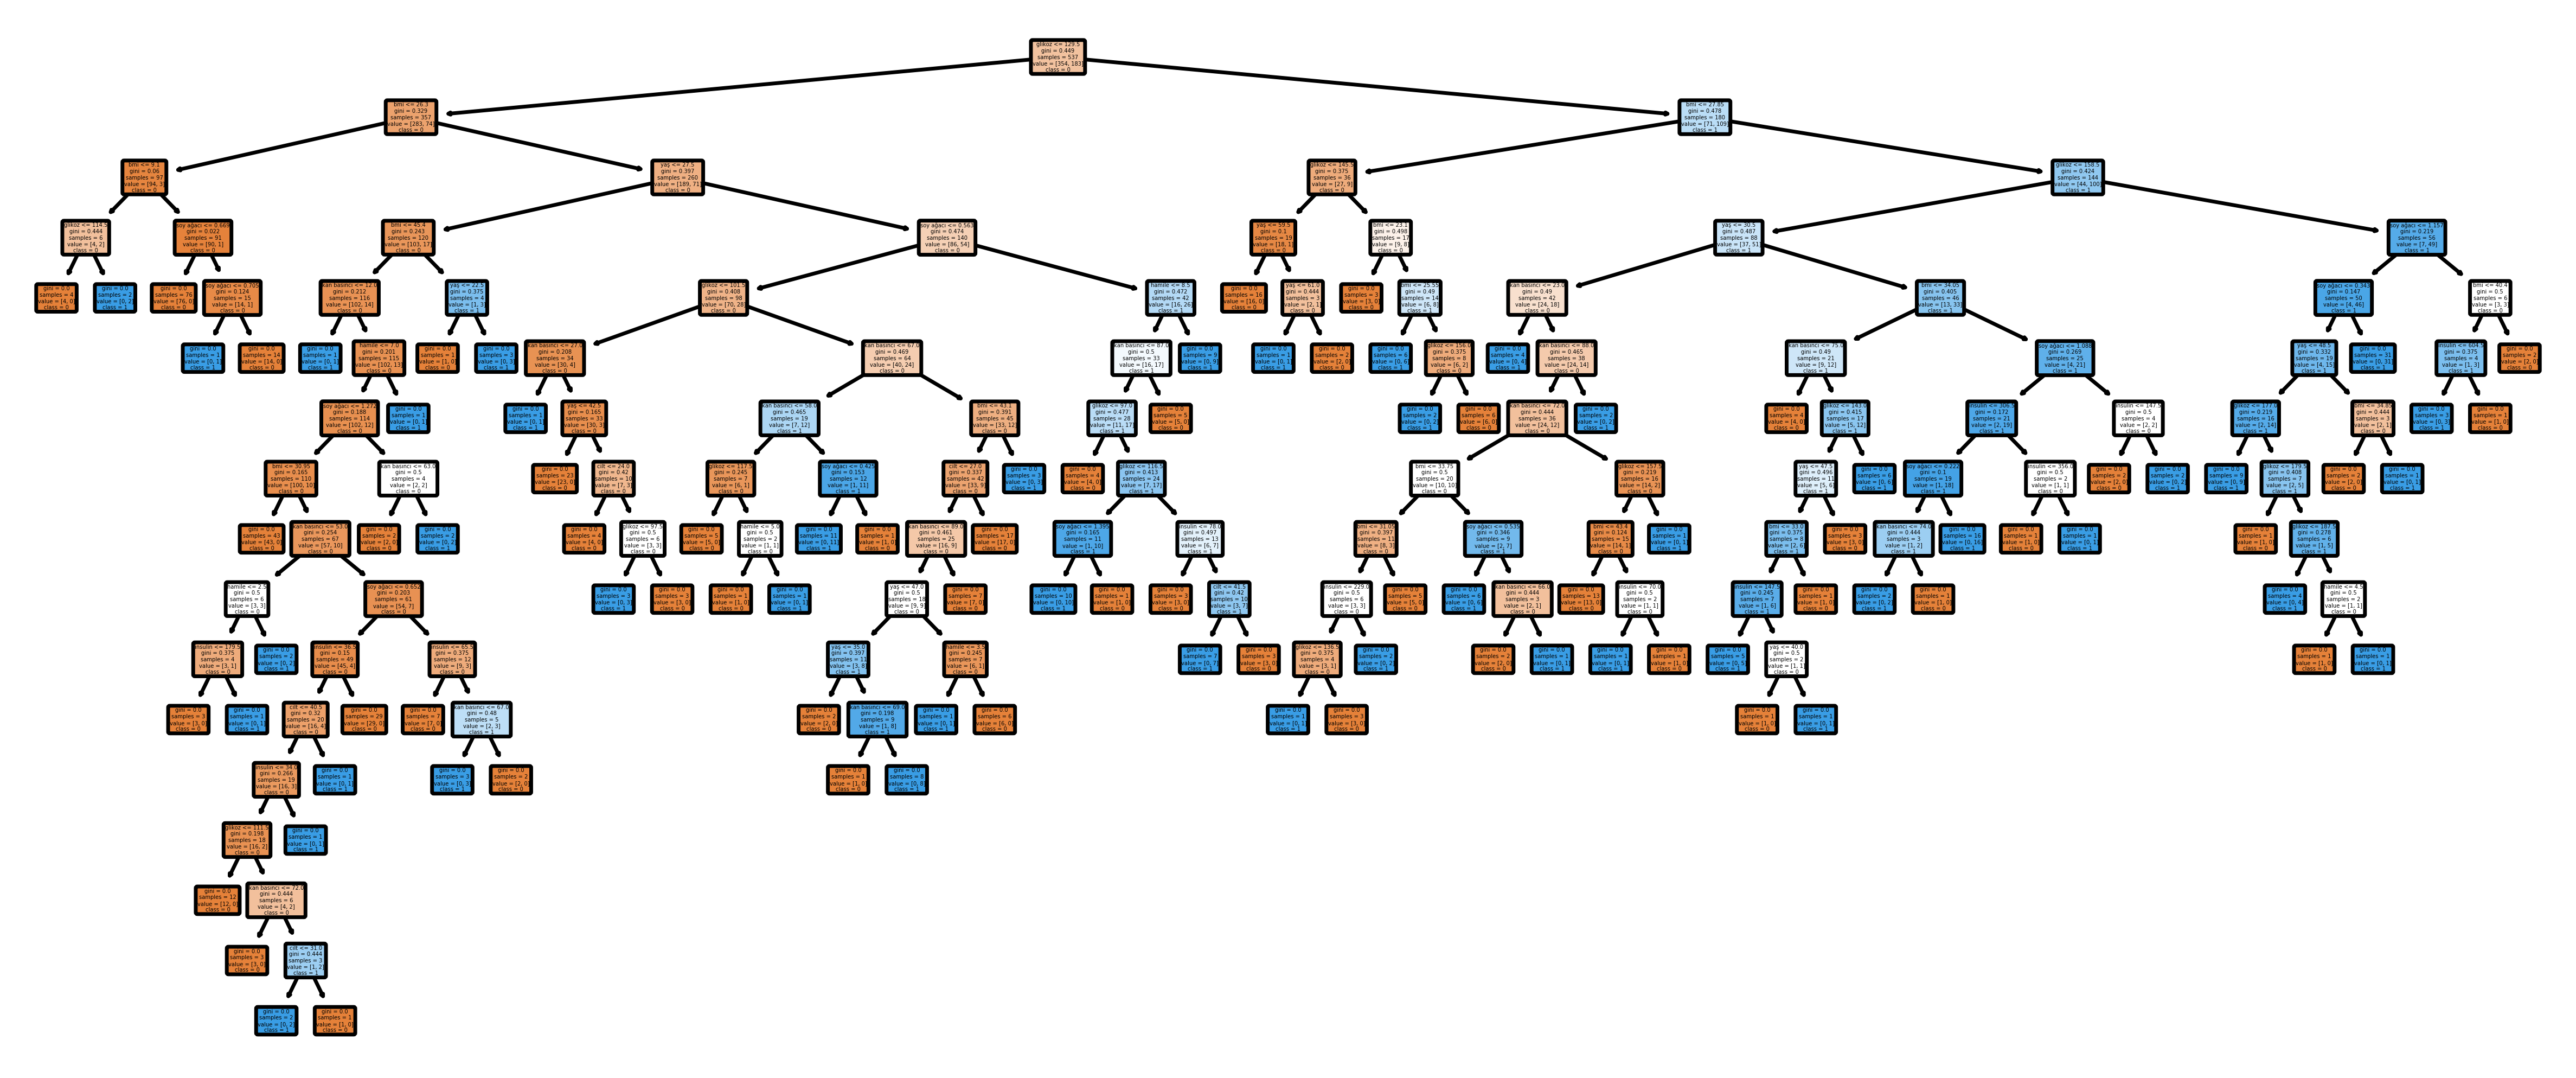

In [71]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(clf,
               feature_names=özellik,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('C:/Users/elif/foto/dtree.png')

In [73]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Test aşaması için Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Test veri kümesi için sonucu tahmin etmek için
y_pred = clf.predict(X_test)

# Model Doğruluğu: sınıflandırıcı ne sıklıkla doğrudur?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Modelin kesinliği : Ne kadarı pozitif 
print("Precision:",metrics.precision_score(y_test, y_pred))

# Hassiyet oranı
print("Recall:",metrics.recall_score(y_test, y_pred))

# F1 Score değeri
print("F1 Score:",metrics.f1_score(y_test, y_pred,average='binary'))


Accuracy: 0.7705627705627706
Precision: 0.7105263157894737
Recall: 0.6352941176470588
F1 Score: 0.6708074534161491


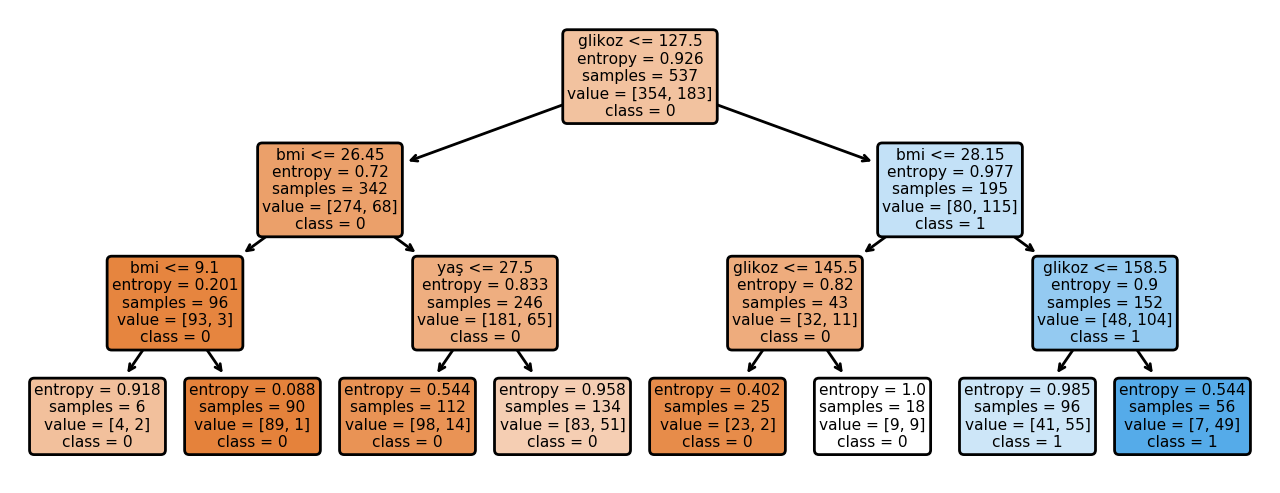

In [74]:
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=özellik,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('C:/Users/elif/foto/diyabet.png')

In [75]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [76]:
from sklearn.metrics import accuracy_score
accuracy_train,accuracy_test=[],[]
for i in ccp_alphas:
    DT_clf=DecisionTreeClassifier(ccp_alpha=i)
    DT_clf.fit(X_train,y_train)
    y_pred_train=DT_clf.predict(X_train)
    y_pred_test=DT_clf.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))

<function matplotlib.pyplot.show(*args, **kw)>

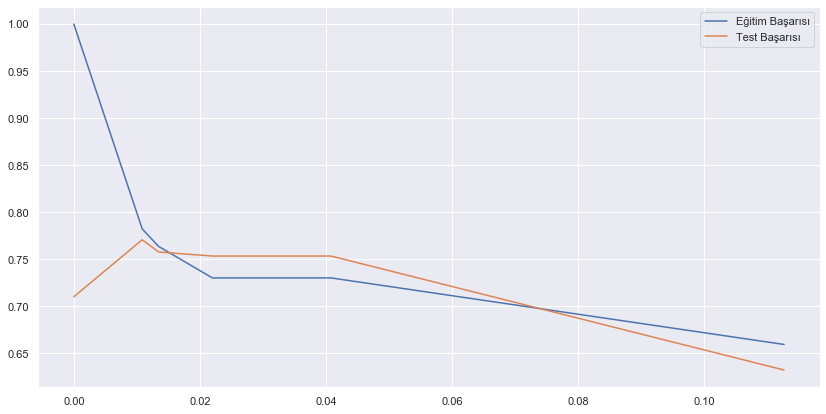

In [77]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=ccp_alphas,label="Eğitim Başarısı")
sns.lineplot(y=accuracy_test,x=ccp_alphas,label="Test Başarısı ")
plt.show

## Decison Tree Ağacının Confusion Matris Üzerinden Çizimi

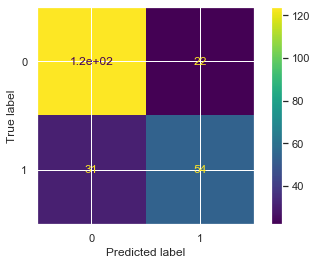

In [78]:
#################################################  DECİSİON TREE MODEL GÖRE CONFUSİON MATRİX  #########################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
DecisionTreeClassifier(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)
disp.plot()
plt.show()

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
#kaçı şeker hastası kaçı sağlıklı birde böyle gösterelim
kontrol=np.array(confusion_matrix(y_test,y_pred,labels=clf.classes_ ))
conf=pd.DataFrame(kontrol,index=['diyabet','sağlıklı'],
                 columns=['tahmini diyabet','tahmini sağlık'])
conf

,tahmini diyabet,tahmini sağlık
diyabet,124,22
sağlıklı,31,54


## Genel Olarak Tüm başarı oranlarını yazdrıralım

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  22]
 [ 31  54]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

